In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [9]:
import io

df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

#This gives a view of Training dataset
print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [13]:
df.shape

(2000, 21)

In [14]:
df.dtypes

,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [16]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [18]:
#check null values
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


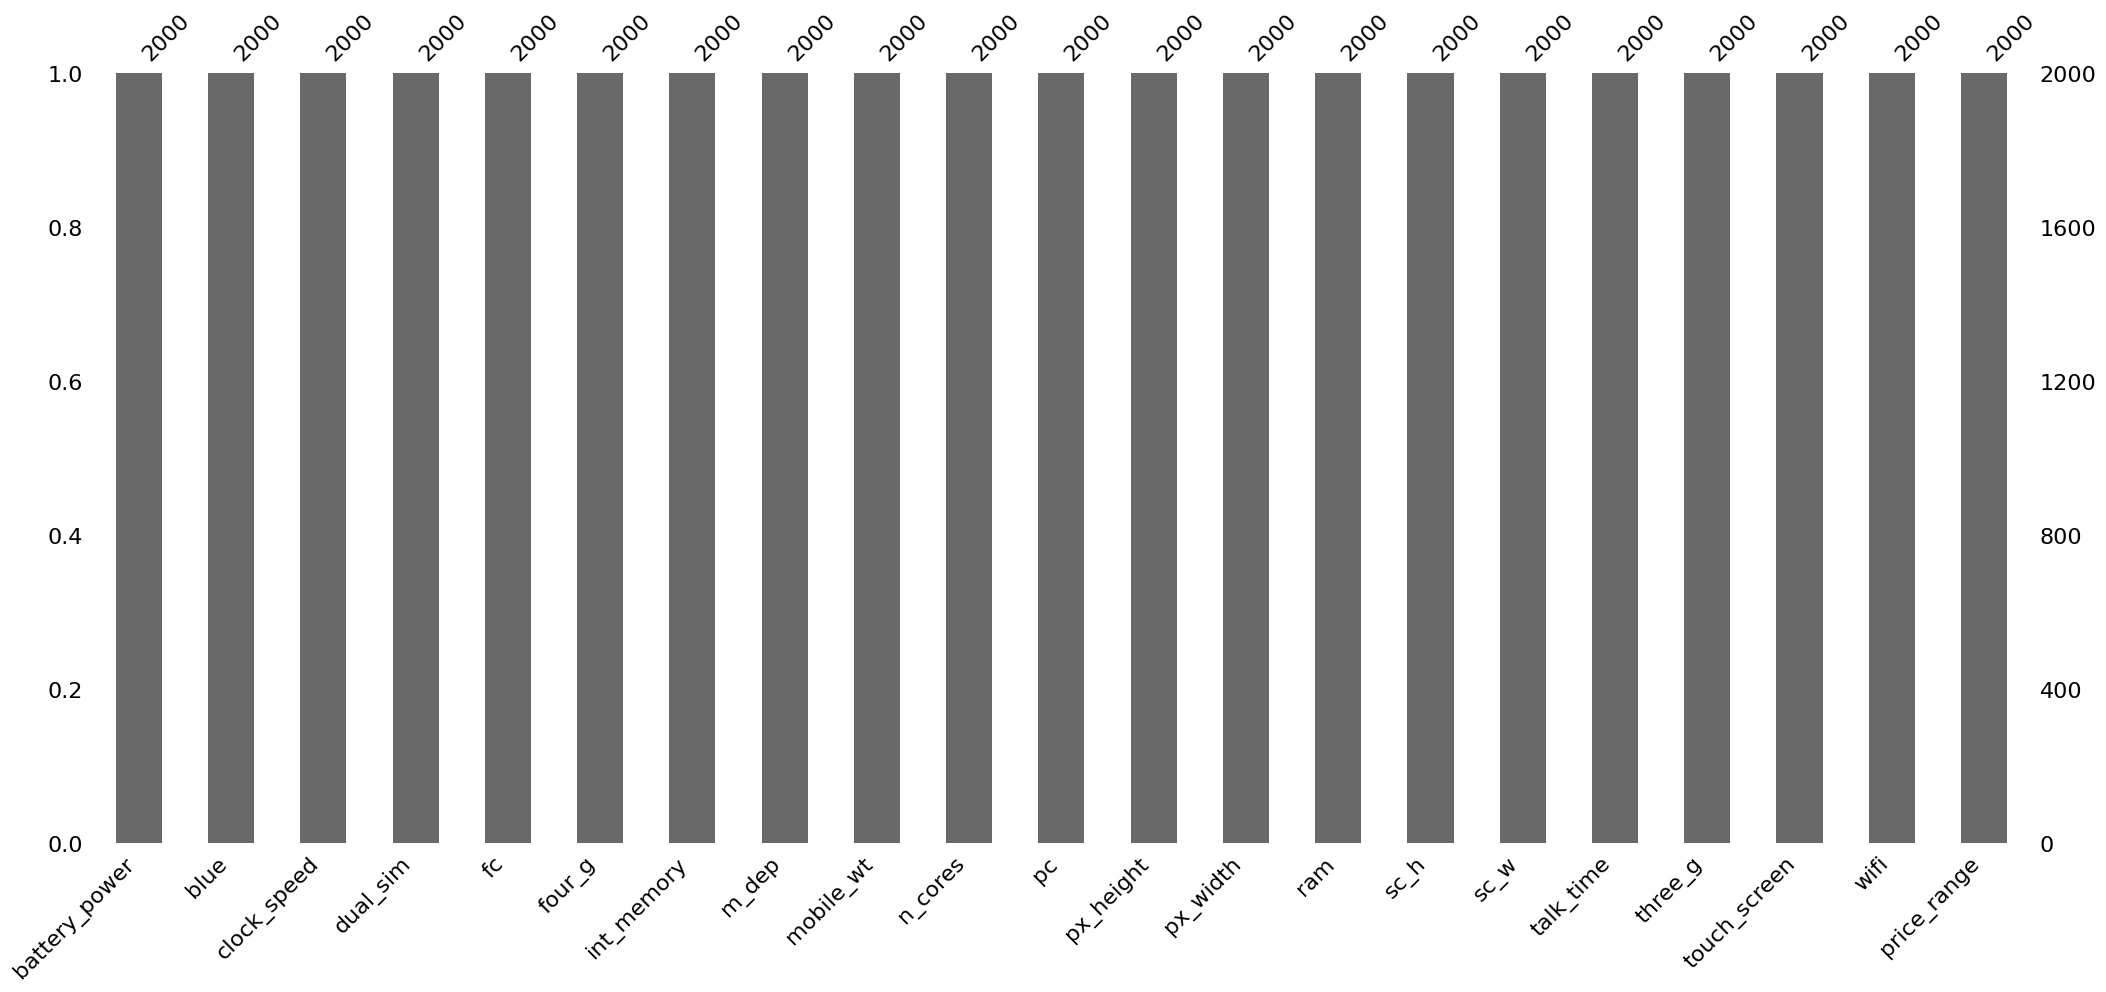

In [19]:
import missingno as msno
msno.bar(df)
plt.show()

In [20]:
df.var()

,0
battery_power,1.930884e+05
blue,2.501001e-01
clock_speed,6.658629e-01
dual_sim,2.500348e-01
fc,1.884813e+01
four_g,2.496626e-01
int_memory,3.292670e+02
m_dep,8.318353e-02
mobile_wt,1.253136e+03
n_cores,5.234197e+00


In [21]:
df['price_range'].unique()

array([1, 2, 3, 0])

**Lets start with Exploratory Data Analysis as we've already understood a little about the training data set considered**

<Axes: xlabel='price_range', ylabel='ram'>

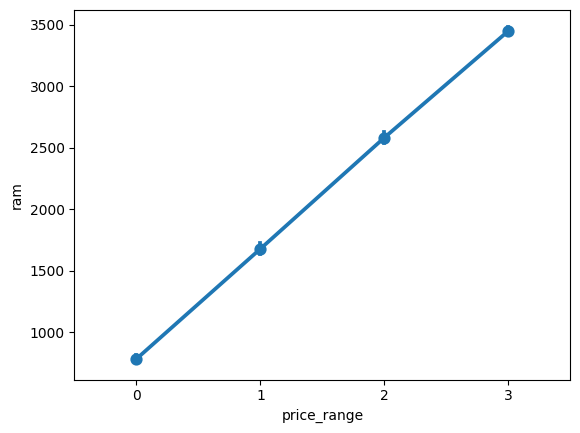

In [22]:
sns.pointplot(y='ram', x='price_range', data=df)

<Axes: xlabel='price_range', ylabel='battery_power'>

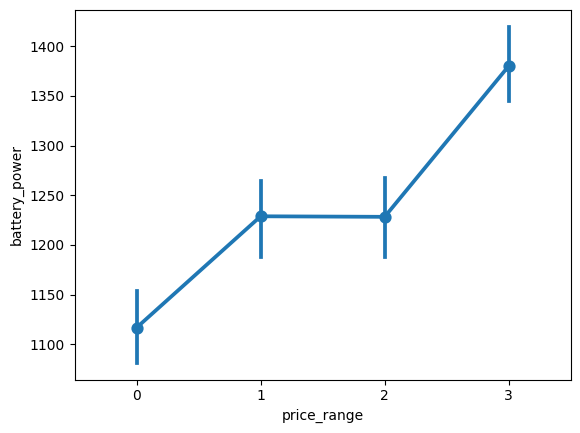

In [25]:
sns.pointplot(x='price_range', y='battery_power', data=df)

<Axes: xlabel='price_range', ylabel='battery_power'>

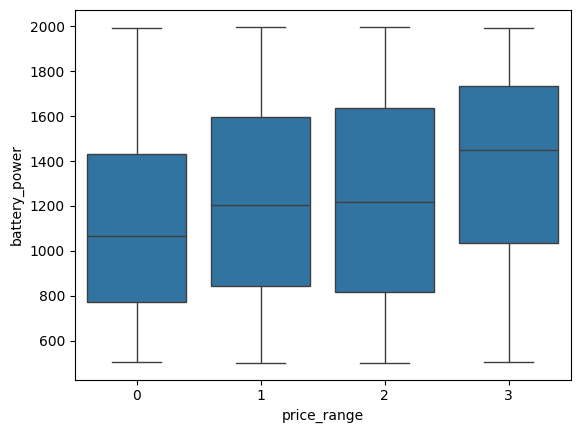

In [26]:
sns.boxplot(x='price_range', y='battery_power', data=df)

<Axes: xlabel='price_range', ylabel='int_memory'>

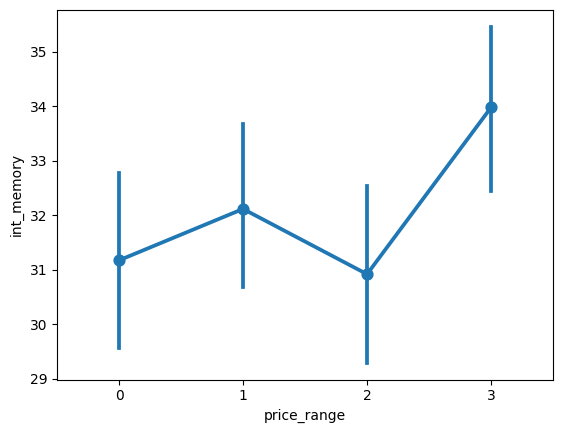

In [27]:
sns.pointplot(x='price_range', y='int_memory', data=df)

In [28]:
col = df.columns
col

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [29]:
categorical_col = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'price_range']

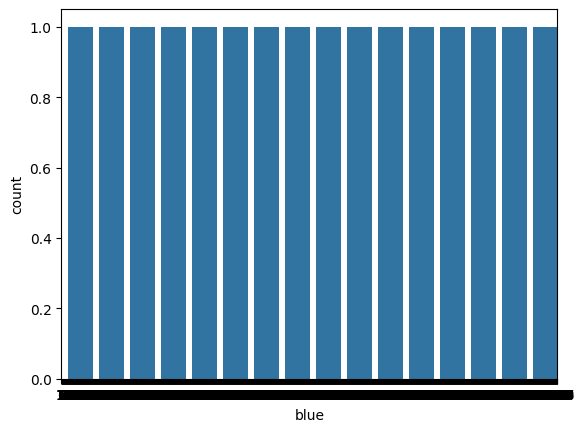

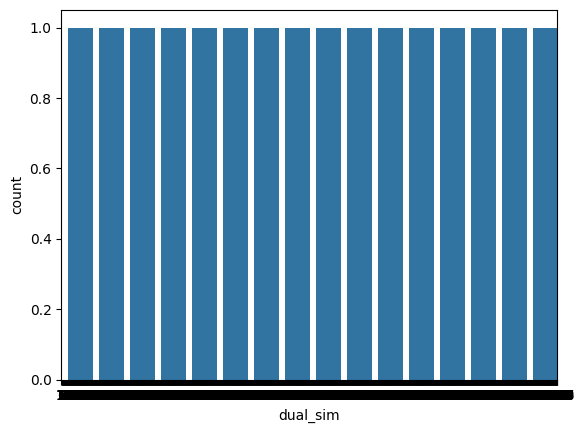

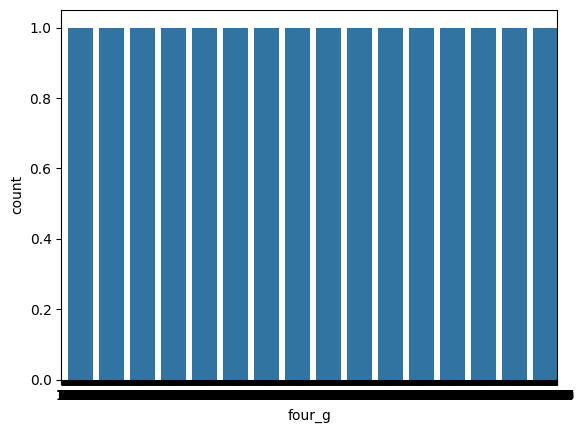

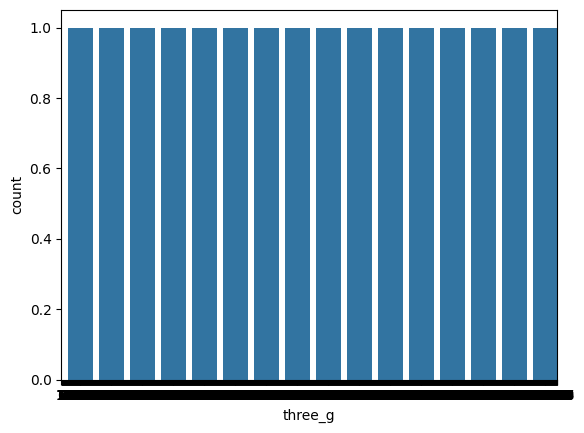

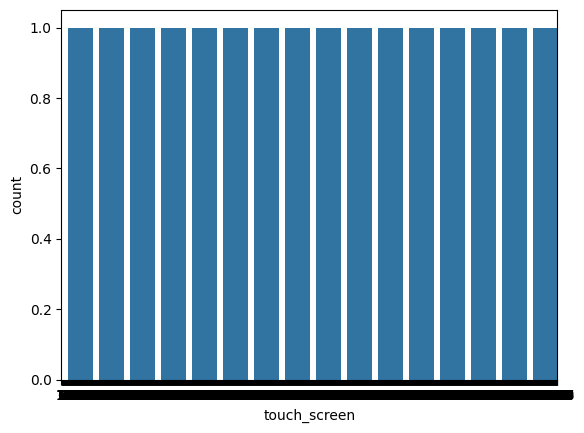

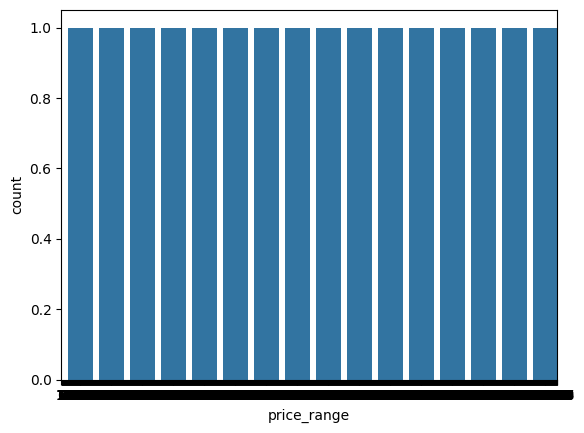

In [31]:
for i in categorical_col:
  sns.countplot(df[i])
  plt.xlabel(i)
  plt.show()

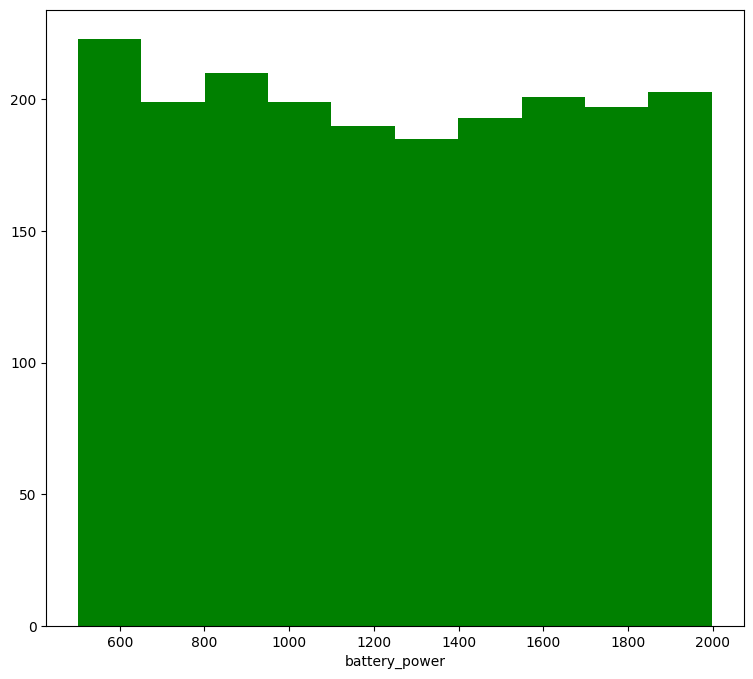

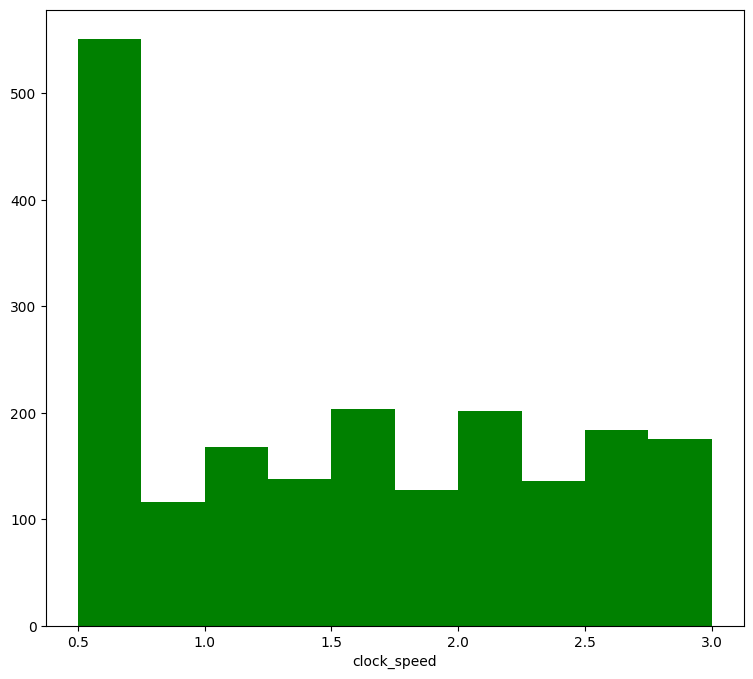

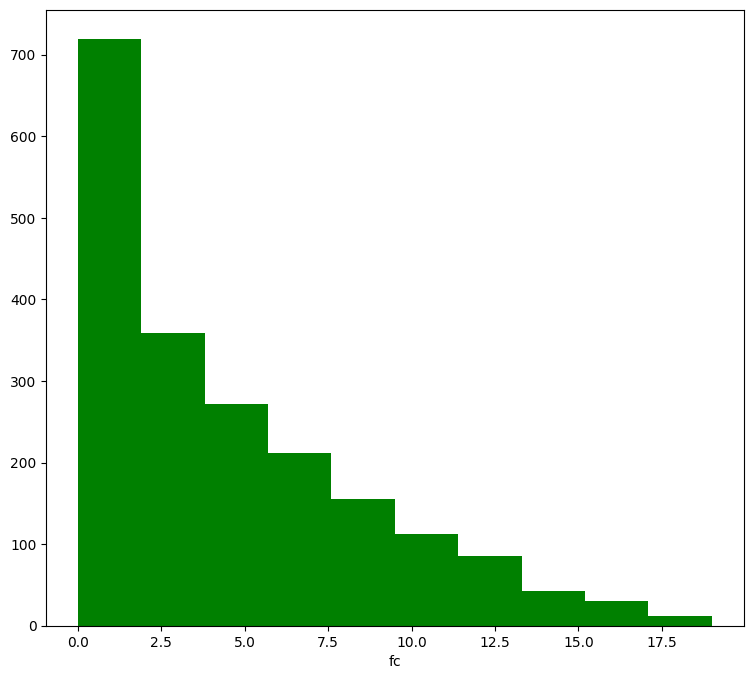

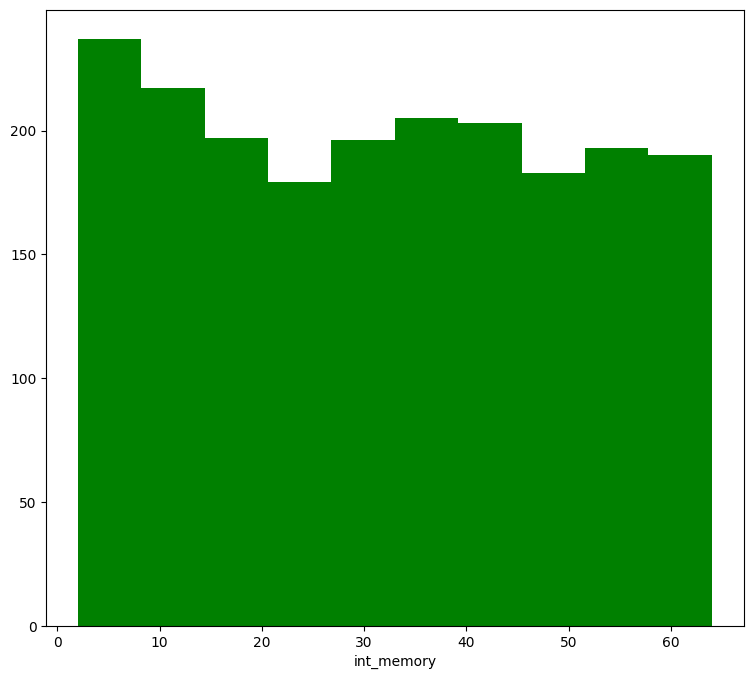

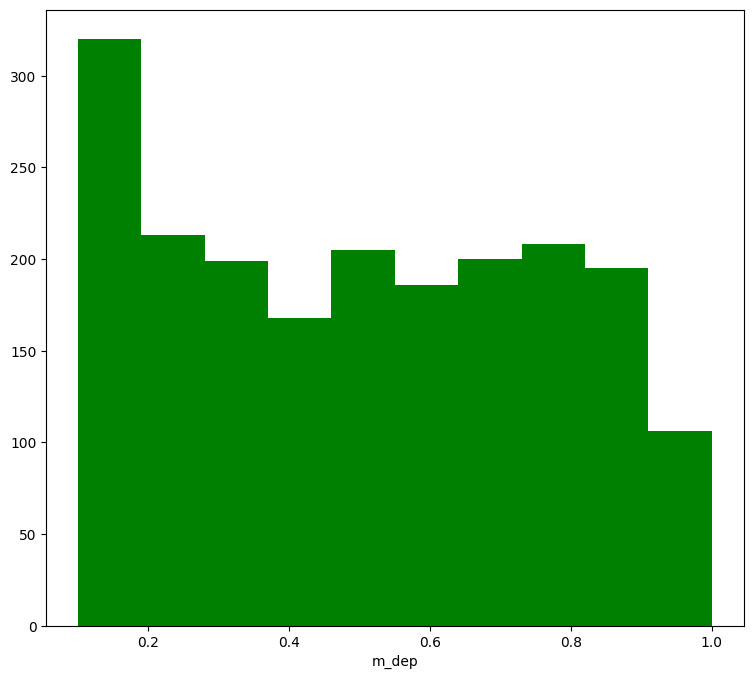

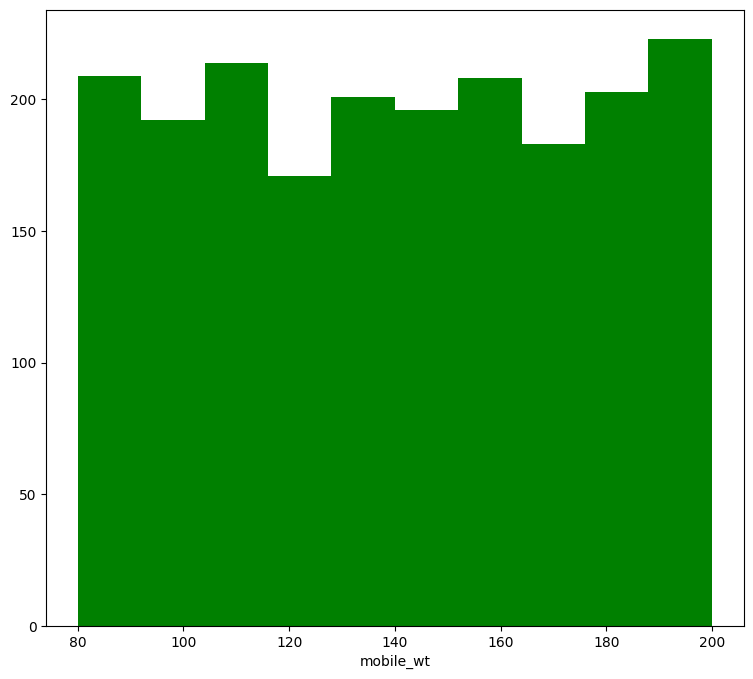

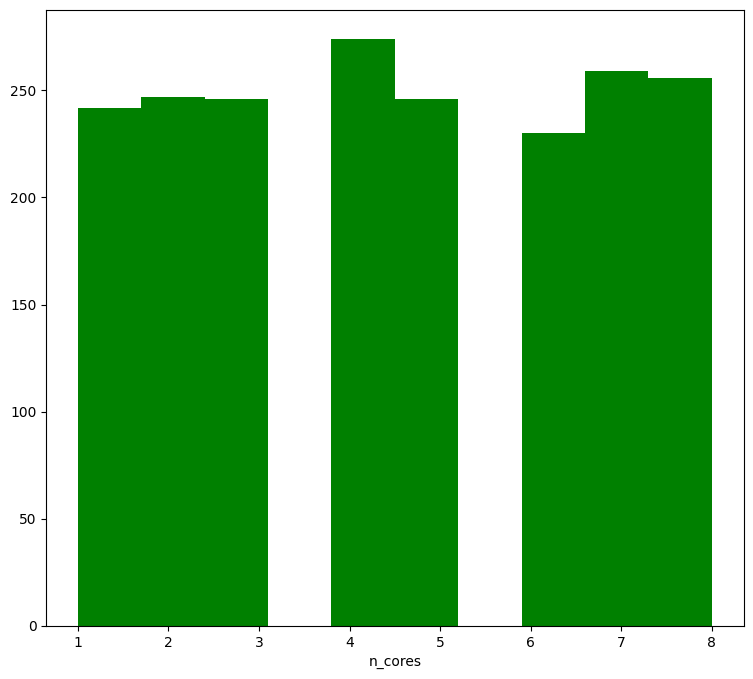

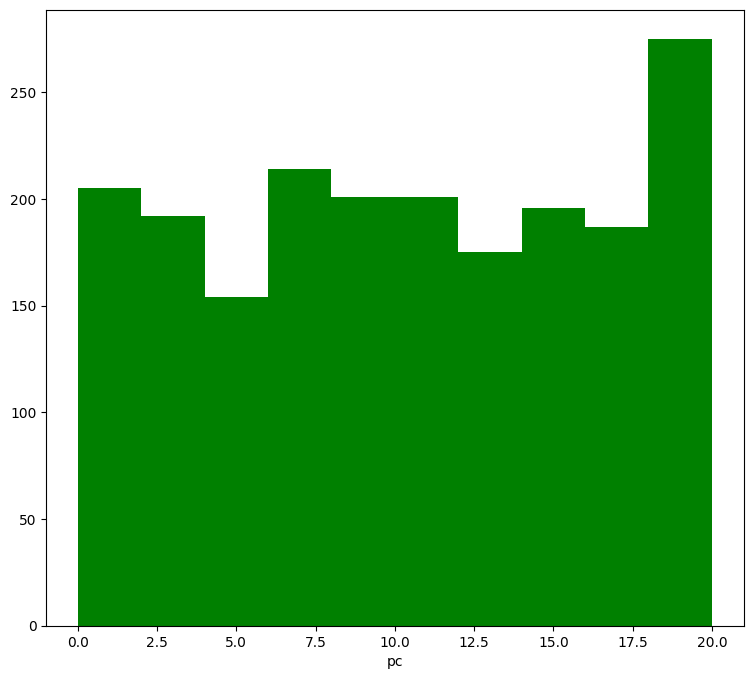

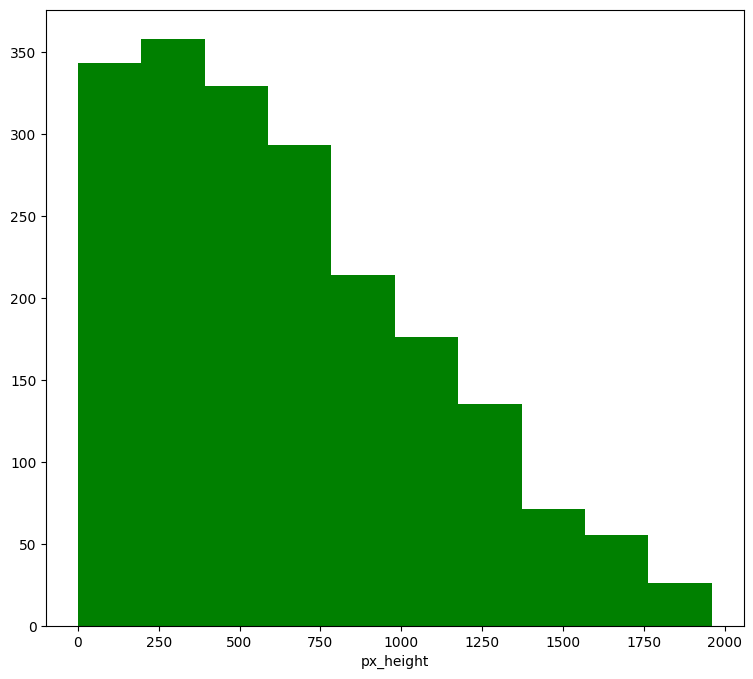

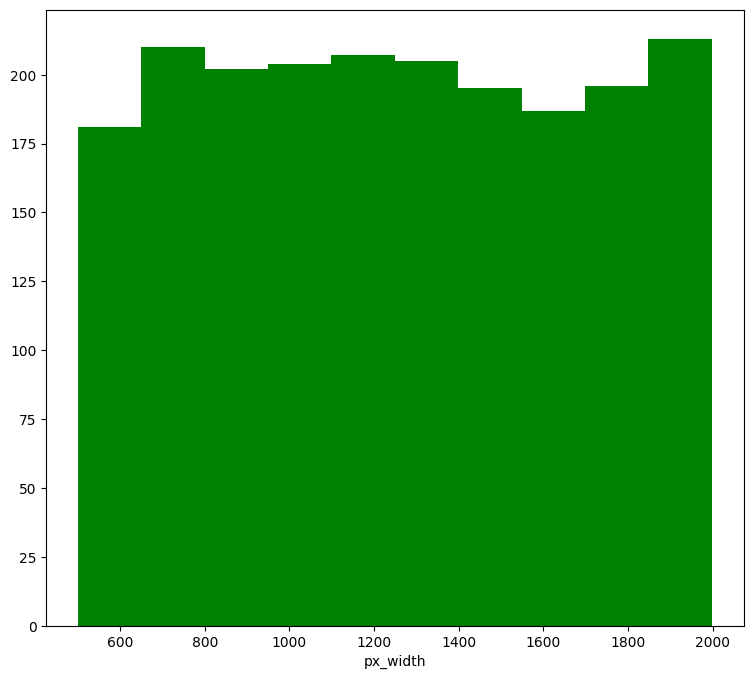

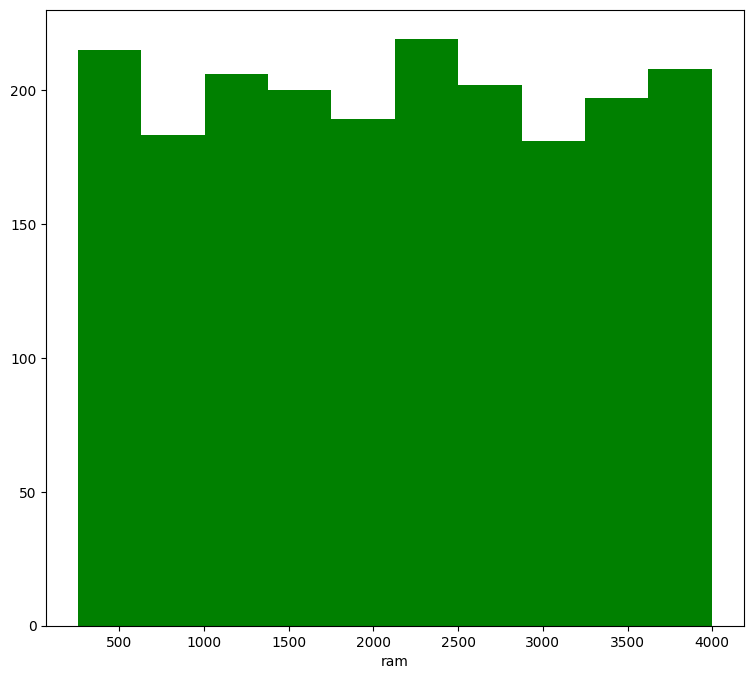

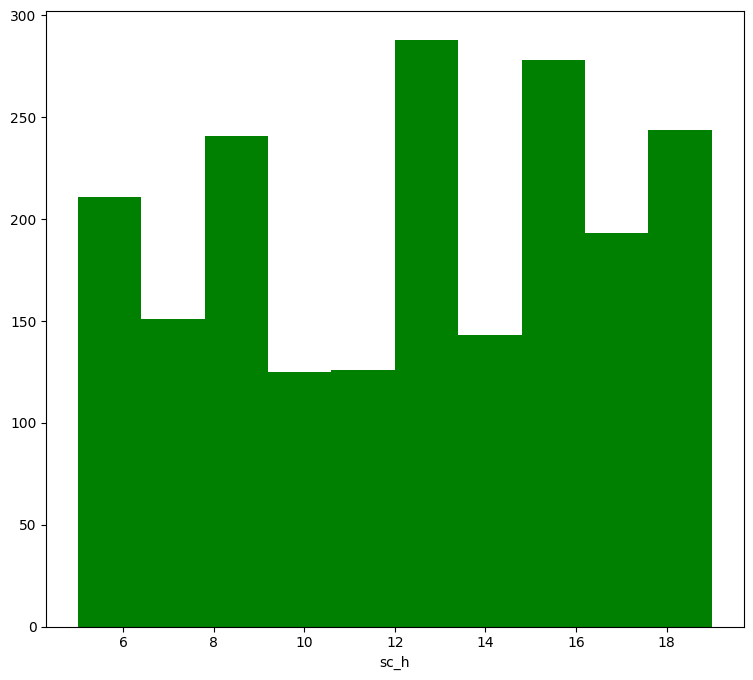

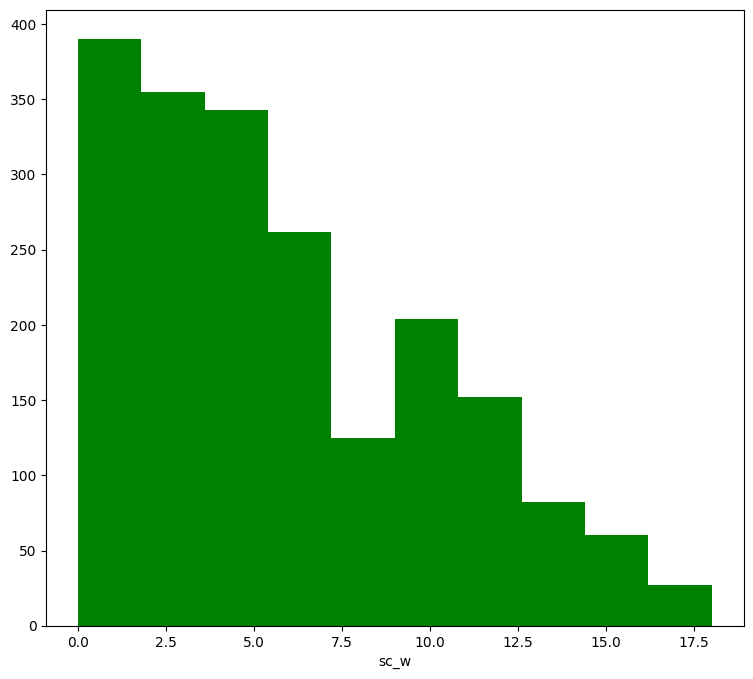

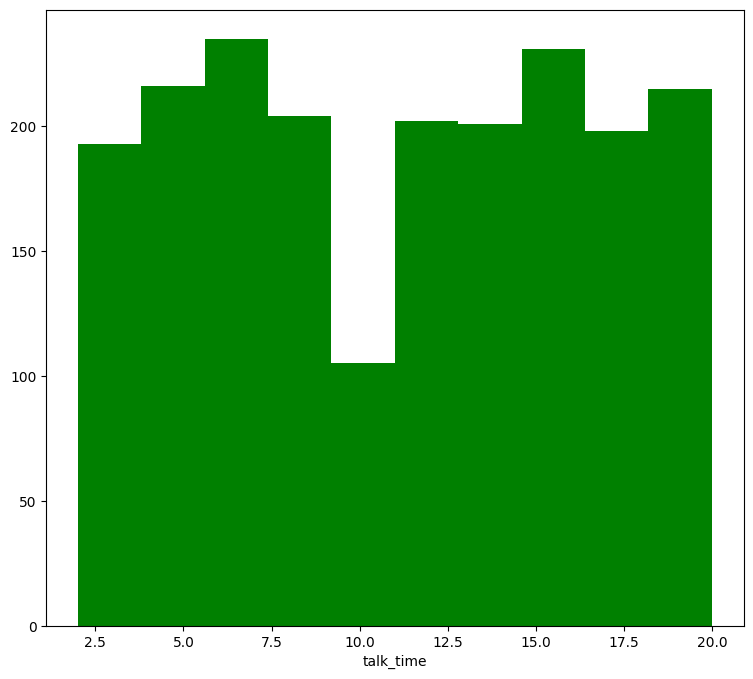

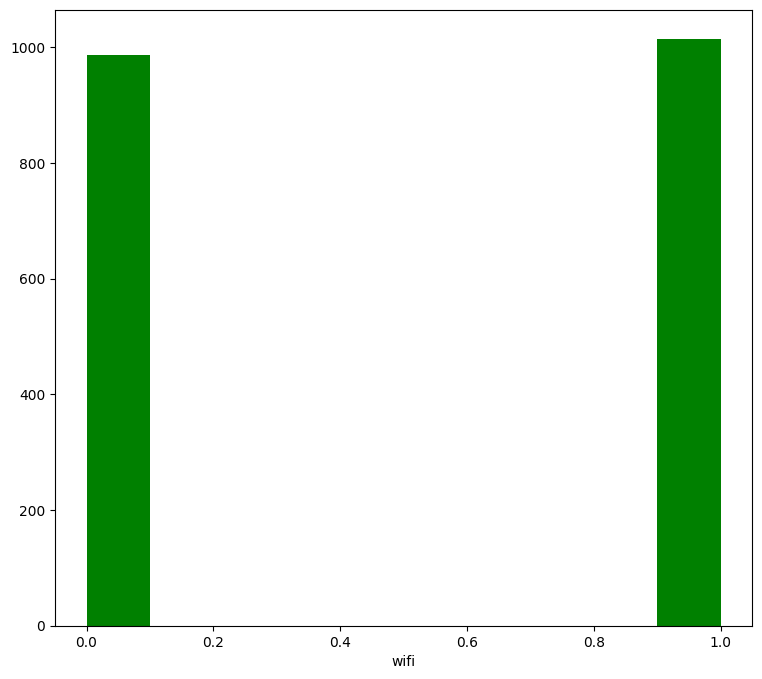

In [34]:
for i in df.drop(df[categorical_col], axis=1):
  fig = plt.figure(figsize=(9,8))
  plt.hist(df[i],color='green',bins=10)
  plt.xlabel(i)
  plt.show()

Text(0.5, 1.0, 'Correlation')

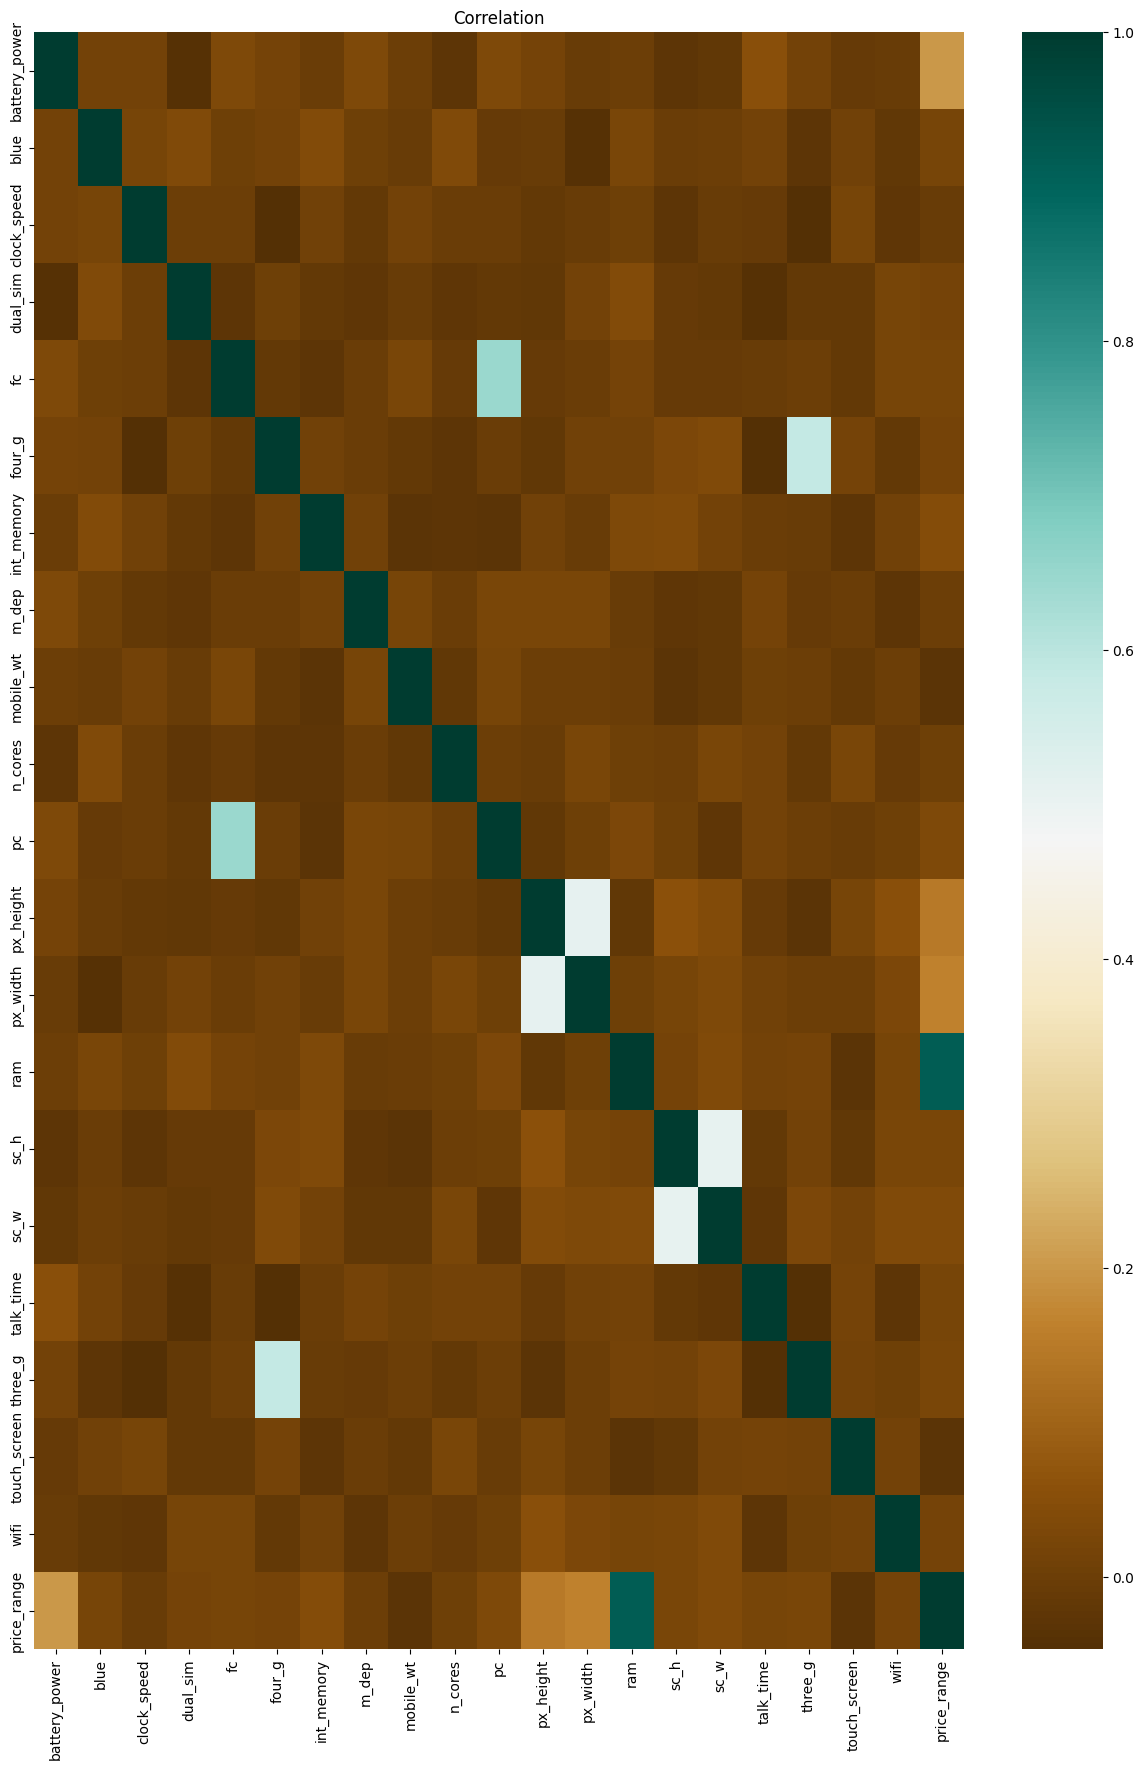

In [36]:
corr=df.corr()
fig=plt.figure(figsize=(15,21))
r=sns.heatmap(corr, cmap = 'BrBG')
r.set_title("Correlation")

<Axes: xlabel='touch_screen', ylabel='ram'>

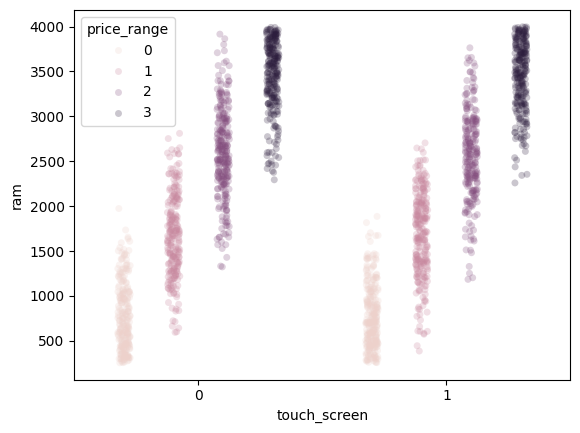

In [37]:
sns.stripplot(x="touch_screen", y="ram", hue="price_range", data=df,dodge=True, jitter = True, alpha=.25, zorder=1)

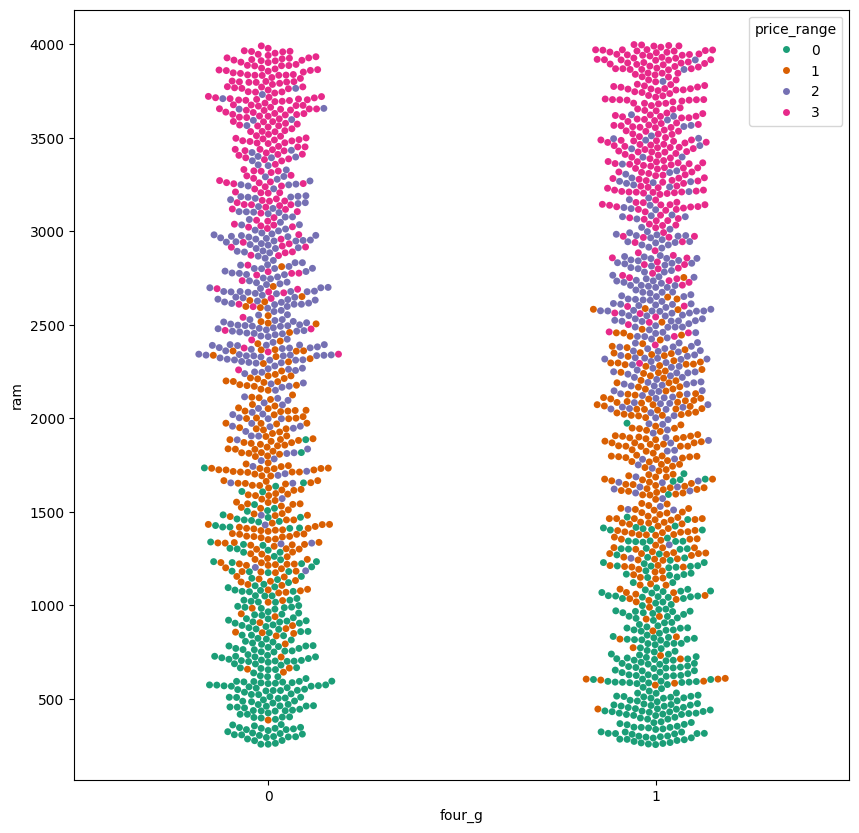

In [38]:
f, ax = plt.subplots(figsize=(10,10))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range", data=df, palette="Dark2")
ax=sns.set(style="darkgrid")

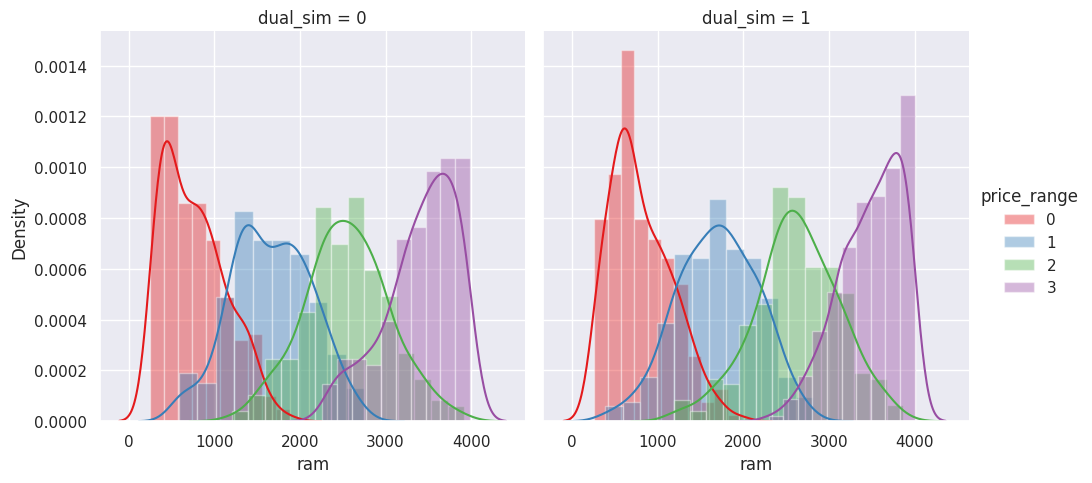

In [39]:
g = sns.FacetGrid(df, col="dual_sim", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())

In [41]:
x=df.drop('price_range', axis=1)
y=df['price_range']
scale=StandardScaler()
scaled=scale.fit_transform(x)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,1.009945,battery_power
1,1.011342,blue
2,1.006025,clock_speed
3,1.011555,dual_sim
4,1.718987,fc
5,1.528509,four_g
6,1.009274,int_memory
7,1.006385,m_dep
8,1.004548,mobile_wt
9,1.008442,n_cores


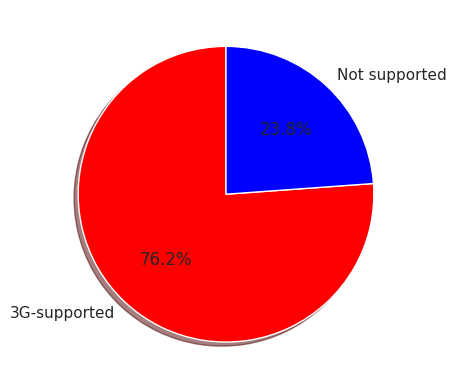

In [44]:
labels = ["3G-supported", 'Not supported']
values = df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'blue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.show()

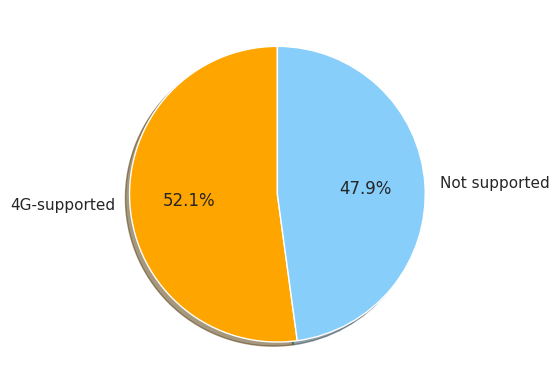

In [45]:
labels = ["4G-supported",'Not supported']
values = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['orange', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

Text(0.5, 0, 'MegaPixels')

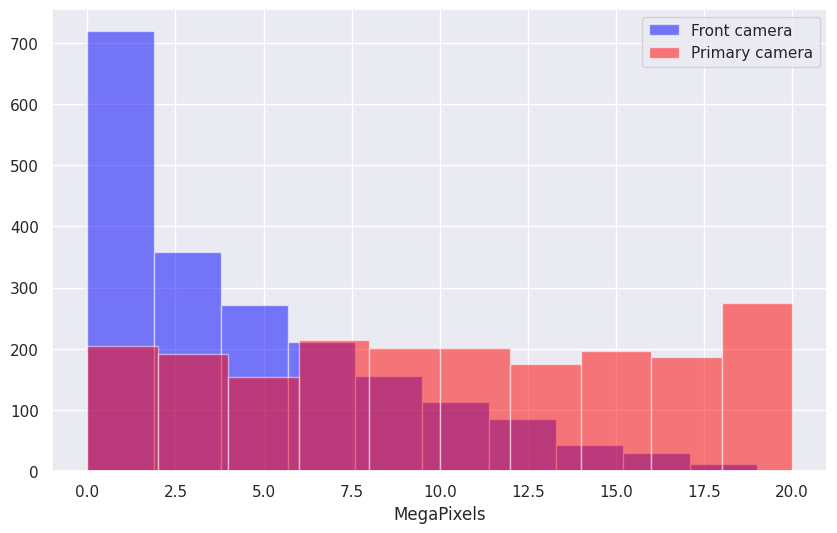

In [46]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

**MODELS**

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=123, stratify=y)

LOGISTIC REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(x_train,y_train)




y_test_predLR = lr.predict(x_test)
y_train_predLR = lr.predict(x_train)

lr_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_predLR,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_predLR,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_predLR,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_predLR,y_test))

Train Set Accuracy:64.26666666666667
Test Set Accuracy:63.0

Confusion Matrix:
[[97 24  0  0]
 [27 66 35  1]
 [ 1 30 57 29]
 [ 0  5 33 95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       121
           1       0.53      0.51      0.52       129
           2       0.46      0.49      0.47       117
           3       0.76      0.71      0.74       133

    accuracy                           0.63       500
   macro avg       0.63      0.63      0.63       500
weighted avg       0.63      0.63      0.63       500



***DECISION TREE***

In [63]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predDT=dtc.predict(x_test)
y_train_predDT=dtc.predict(x_train)

print("Train set Accuracy:" +str(accuracy_score(y_train_predDT,y_train)*100))
print("Test Set Accuracy:" +str(accuracy_score(y_test_predDT,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_predDT,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_predDT,y_test))

Train set Accuracy:100.0
Test Set Accuracy:80.80000000000001

Confusion Matrix:
[[109  14   0   0]
 [ 16  96  20   1]
 [  0  14  89  14]
 [  0   1  16 110]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       123
           1       0.77      0.72      0.74       133
           2       0.71      0.76      0.74       117
           3       0.88      0.87      0.87       127

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



In [68]:
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3,5,7,10],
    'min_samples_split' : range(2,10,1),
    'min_samples_leaf' : range(2,10,1)
}

grid_search = GridSearchCV(dtc, grid_params, cv=5, n_jobs=-1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [69]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 3}

In [70]:
dtc = grid_search.best_estimator_

In [71]:
y_predi=dtc.predict(x_test)

In [72]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_predi)

print(f"Training Accuracy of SVC Model is {dtc_train_acc}")
print(f"Test Accuracy of SVC Model is {dtc_test_acc}")

Training Accuracy of SVC Model is 0.924
Test Accuracy of SVC Model is 0.848


***SVM***

In [64]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train, y_train)

y_test_predSV = svc.predict(x_test)
y_train_predSV = svc.predict(x_train)

svc_acc=accuracy_score(y_test_predSV, y_test)

print("Train Set Accuracy:" +str(accuracy_score(y_train_predSV,y_train)*100))
print("Test Set Accuract:" +str(accuracy_score(y_test_predSV, y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_predSV,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_predSV, y_test))

Train Set Accuracy:94.93333333333334
Test Set Accuract:94.0

Confusion Matrix:
[[124   8   0   0]
 [  1 114   9   0]
 [  0   3 112   5]
 [  0   0   4 120]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       132
           1       0.91      0.92      0.92       124
           2       0.90      0.93      0.91       120
           3       0.96      0.97      0.96       124

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



NAIVE BAYES

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Naive Bayes classifier
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(x_train, y_train)

# Make predictions on the test set
y_test_predNB = nb_model.predict(x_test)
y_train_predNB = nb_model.predict(x_train)

# Calculate accuracy
nb_acc = accuracy_score(y_test_predNB, y_test)

print("Train Set Accuracy: " + str(accuracy_score(y_train_predNB, y_train) * 100))
print("Test Set Accuracy: " + str(nb_acc * 100))
print("\nConfusion Matrix:\n%s" % confusion_matrix(y_test, y_test_predNB))
print("\nClassification Report:\n%s" % classification_report(y_test, y_test_predNB))


Train Set Accuracy: 81.8
Test Set Accuracy: 79.0

Confusion Matrix:
[[108  17   0   0]
 [ 14  95  16   0]
 [  0  30  85  10]
 [  0   1  17 107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       125
           1       0.66      0.76      0.71       125
           2       0.72      0.68      0.70       125
           3       0.91      0.86      0.88       125

    accuracy                           0.79       500
   macro avg       0.80      0.79      0.79       500
weighted avg       0.80      0.79      0.79       500



KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_test_predKN = knn.predict(x_test)
y_train_predKN=knn.predict(x_train)

knn_acc=accuracy_score(y_test_pred1,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_predKN,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_predKN,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_predKN,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_predKN,y_test))

Train Set Accuracy:95.13333333333334
Test Set Accuracy:89.8

Confusion Matrix:
[[124  15   0   0]
 [  1 104  12   0]
 [  0   6 110  14]
 [  0   0   3 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       139
           1       0.83      0.89      0.86       117
           2       0.88      0.85      0.86       130
           3       0.89      0.97      0.93       114

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



In [73]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree Classifier', 'SVC', 'Naive bayes', 'KNN'],
    'Score': [lr_acc, dtc_test_acc, svc_acc, nb_acc, knn_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVC,0.940
4,KNN,0.898
1,Decision Tree Classifier,0.848
3,Naive bayes,0.790
0,Logistic Regression,0.630


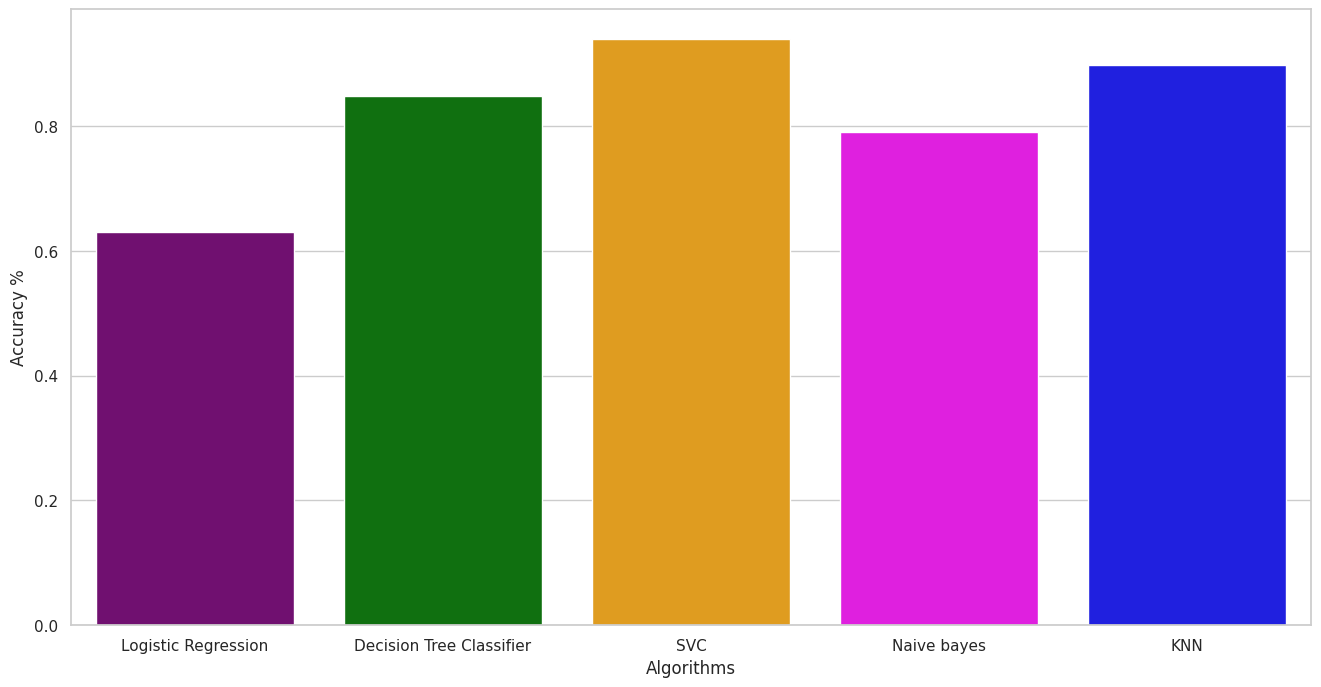

In [74]:
colors = ["purple", "green", "orange", "magenta","blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()